In [1]:
%matplotlib

Using matplotlib backend: MacOSX


In [2]:
import mne
from pprint import pprint
import json
import csv
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

In [4]:
"""
## TESTING LOOP
root_data_path = Path("/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG")
meg_data_path = root_data_path / "LTTC_MEG_ALL_results"

print(root_data_path)

sub_id = 16

n_epoch_LDT = mne.read_epochs(meg_data_path / Path('S%.3d_ICAed_LDT-epo.fif' %sub_id))
#n_epoch_LDT = n_epoch_LDTfile.load_data().get_data()

#print(n_epoch_LDTfile.info)
n_epoch_LDT.pick('mag')
print(type(n_epoch_LDT))
"""

'\n## TESTING LOOP\nroot_data_path = Path("/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG")\nmeg_data_path = root_data_path / "LTTC_MEG_ALL_results"\n\nprint(root_data_path)\n\nsub_id = 16\n\nn_epoch_LDT = mne.read_epochs(meg_data_path / Path(\'S%.3d_ICAed_LDT-epo.fif\' %sub_id))\n#n_epoch_LDT = n_epoch_LDTfile.load_data().get_data()\n\n#print(n_epoch_LDTfile.info)\nn_epoch_LDT.pick(\'mag\')\nprint(type(n_epoch_LDT))\n'

In [3]:
## TESTING LOOP
root_data_path = Path("/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG")
meg_data_path = root_data_path / "LTTC_MEG_ALL_results"

#meg_data_path = Path("/Users/ting-hsin/Downloads/TMP_File_forIRB")

#print(root_data_path)

tmp_sub_epochsLIST = []
all_sub_epochsLIST = []

for idINT in range(9, 17):
    sub_id = idINT

    n_epoch_LDT = mne.read_epochs(meg_data_path / Path('S%.3d_ICAed_LDT-epo.fif' %sub_id))
    #n_epoch_LDT = n_epoch_LDTfile.load_data().get_data()

    #print(n_epoch_LDTfile.info)
    n_epoch_LDT.pick('mag')
    tmp_sub_epochsLIST.extend([n_epoch_LDT])
    all_sub_epochsLIST = mne.concatenate_epochs(tmp_sub_epochsLIST)
all_sub_epochsLIST

Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S009_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S010_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
113 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
Not setting metadata
2

<Epochs |  952 events (all good), -0.1 - 0.7 sec, baseline [-0.1, 0] sec, ~457.4 MB, data loaded,
 'Control': 476
 'High_CD': 237
 'Low_CD': 239>

In [20]:
all_sub_epochsLIST.save(meg_data_path / Path('009-016_LDT-merge-epo.fif'), overwrite=True)

Overwriting existing file.


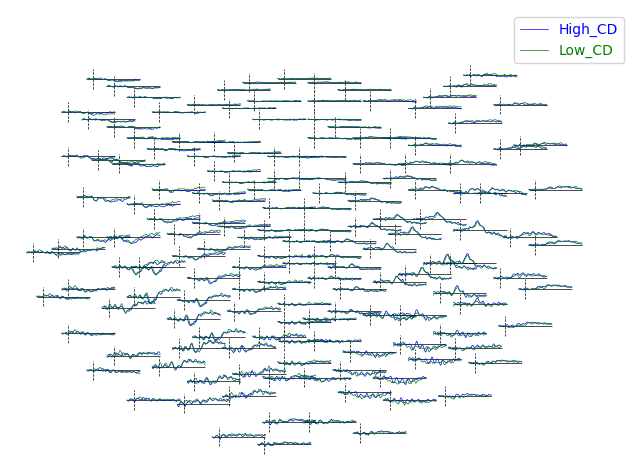

In [4]:
# To see the average evoked of every participants so far

#evoked_C = all_sub_epochsLIST["Control"].average()
evoked_H = all_sub_epochsLIST["High_CD"].average()
evoked_L = all_sub_epochsLIST["Low_CD"].average()

#evoked_C.comment = 'Control'
evoked_H.comment = 'High_CD'
evoked_L.comment = 'Low_CD'

tmp = [evoked_H, evoked_L] # [evoked_H, evoked_L]evoked_C, 
colors = 'blue', 'green'  #C:'red'H:'blue'; L:'green';   # 'blue', 'green'
mne.viz.plot_evoked_topo(tmp, color = colors)

In [11]:
# Plot the joint
#mne.viz.plot_compare_evokeds(tmp, picks='mag')
H_minus_L = mne.combine_evoked([evoked_H, evoked_L], weights=[1, -1])
H_minus_L.plot_joint()
plt.savefig(meg_data_path / Path('H-minus-L_evoked.png'), overwrite=True)

# Plot the specific times
times = np.linspace(0.05, 0.650, 13)
H_minus_L.plot_topomap(ch_type='mag', times=times, colorbar=True)
plt.savefig(meg_data_path / Path('H-minus-L_evoked_topomap.png'), overwrite=True)

No projector specified for this dataset. Please consider the method self.add_proj.


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_11931/2689659872.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(meg_data_path / Path('H-minus-L_evoked.png'), overwrite=True)
/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_11931/2689659872.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(meg_data_path / Path('H-minus-L_evoked_topomap.png'), overwrite=True)


In [12]:
#evoked_C = n_epoch_LDT["Control"].average()
evoked_H = all_sub_epochsLIST["High_CD"].average()
evoked_L = all_sub_epochsLIST["Low_CD"].average()

times = np.linspace(0.05, 0.45, 9)
#evoked_C.plot_topomap(ch_type='mag', times=times, colorbar=True)
evoked_H.plot_topomap(ch_type='mag', times=times, colorbar=True)
plt.savefig(meg_data_path / Path('HCD-evoked_topomap.png'), overwrite=True)
evoked_L.plot_topomap(ch_type='mag', times=times, colorbar=True)
plt.savefig(meg_data_path / Path('LCD-evoked_topomap.png'), overwrite=True)

/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_11931/3194938901.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(meg_data_path / Path('HCD-evoked_topomap.png'), overwrite=True)
/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_11931/3194938901.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(meg_data_path / Path('LCD-evoked_topomap.png'), overwrite=True)


In [9]:
# Check the resluts of some channel
# MEG 043最大/ MEG 048_跟046一樣小/ MEG 045 ＝ MEG 044＿比046大一點/ MEG 046_小/ MEG 047_比046小

mne.viz.plot_compare_evokeds(tmp, picks='MEG 043')
mne.viz.plot_compare_evokeds(tmp, picks='MEG 044')
mne.viz.plot_compare_evokeds(tmp, picks='MEG 045')
mne.viz.plot_compare_evokeds(tmp, picks='MEG 048')

[<Figure size 800x600 with 2 Axes>]

In [9]:
MEG_043_topofig = mne.viz.plot_compare_evokeds(tmp, picks='MEG 043')
plt.savefig(meg_data_path / Path('MEG_043_evoked.png'), overwrite=True)

<ipython-input-9-c53f7bf7337c>:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(meg_data_path / Path('MEG_043_evoked.png'), overwrite=True)


In [13]:
evoked_H.plot_joint()
plt.savefig(meg_data_path / Path('HCD-evoked_joint.png'), overwrite=True)
evoked_L.plot_joint()
plt.savefig(meg_data_path / Path('LCD-evoked_joint.png'), overwrite=True)

No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.


/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_11931/3550134059.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(meg_data_path / Path('HCD-evoked_joint.png'), overwrite=True)
/var/folders/dt/yj00f34n5x52_p314tnwfjkw0000gn/T/ipykernel_11931/3550134059.py:4: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(meg_data_path / Path('LCD-evoked_joint.png'), overwrite=True)
